<a href="https://colab.research.google.com/github/dmnarula/football-ds-learning/blob/main/week3-visualization/Week3_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd
import matplotlib.pyplot as plt # for plotting

url = "https://raw.githubusercontent.com/dmnarula/football-ds-learning/refs/heads/main/sample_data/pl_24_25_small.csv"
df = pd.read_csv(url)

df.head()

,name,club,position,minutes,goals,assists,xG,xA
0,Bukayo Saka,Arsenal,FWD,2850,16,10,15.2,9.5
1,Martin Odegaard,Arsenal,MID,2900,11,9,10.8,8.7
2,Gabriel Jesus,Arsenal,FWD,2100,9,6,11.4,5.2
3,Declan Rice,Arsenal,MID,3200,6,5,5.3,6.1
4,Leandro Trossard,Arsenal,FWD,1950,10,4,9.1,3.6


In [2]:
df = df.rename(columns={
    "minutes": "mins",
    "goals": "G",
    "assists": "A"
}
)

df["GI"] = df["G"] + df["A"]
df["GI_per_90"] = (df["GI"] / (df["mins"]/90)).round(2)

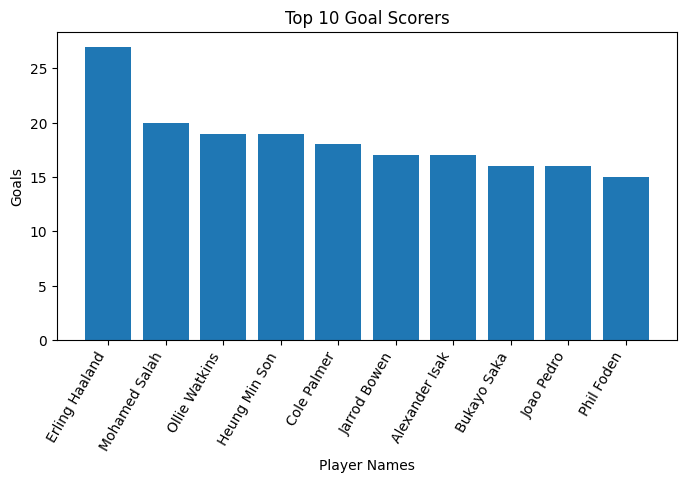

In [3]:
top_players = df.sort_values(by="G", ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.bar(top_players["name"], top_players["G"])
plt.xticks(rotation=60, ha="right")
plt.ylabel("Goals")
plt.xlabel("Player Names")
plt.title("Top 10 Goal Scorers")
plt.show()

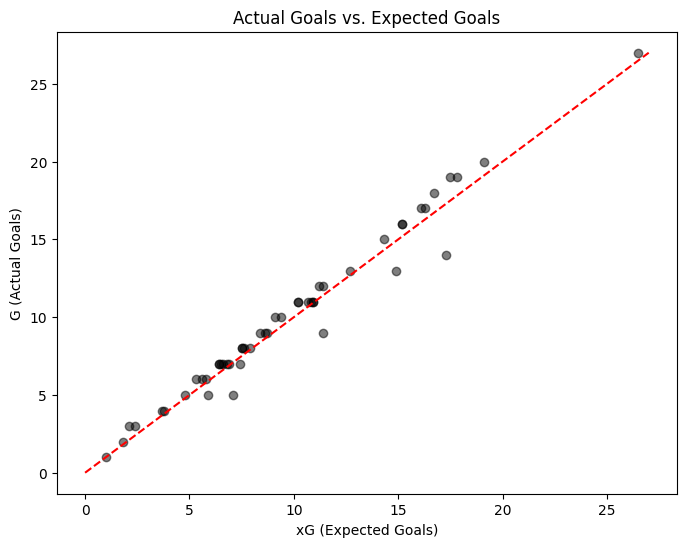

In [4]:
plt.figure(figsize=(8,6))

plt.scatter(df["xG"], df["G"], color="black", alpha=0.5)
plt.xlabel("xG (Expected Goals)")
plt.ylabel("G (Actual Goals)")
plt.title("Actual Goals vs. Expected Goals")

max_val = max(df["xG"].max(), df["G"].max())
plt.plot([0, max_val], [0, max_val], color="red", linestyle="--")


plt.show()

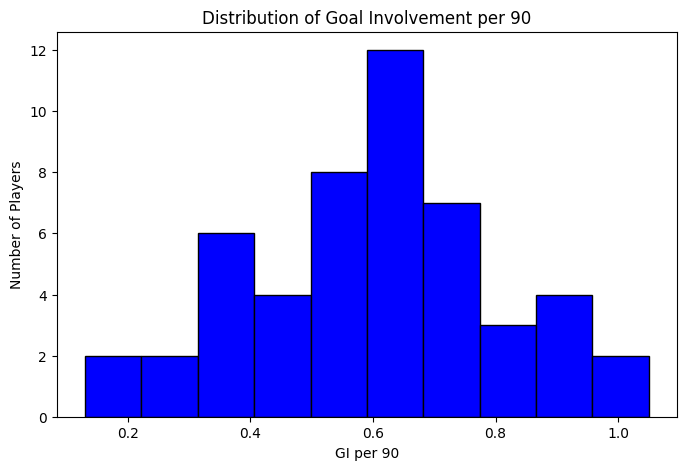

In [5]:
plt.figure(figsize=(8,5)),

plt.hist(df["GI_per_90"], bins=10, edgecolor="black", color="blue")

plt.xlabel("GI per 90")
plt.ylabel("Number of Players")
plt.title("Distribution of Goal Involvement per 90")

plt.show()

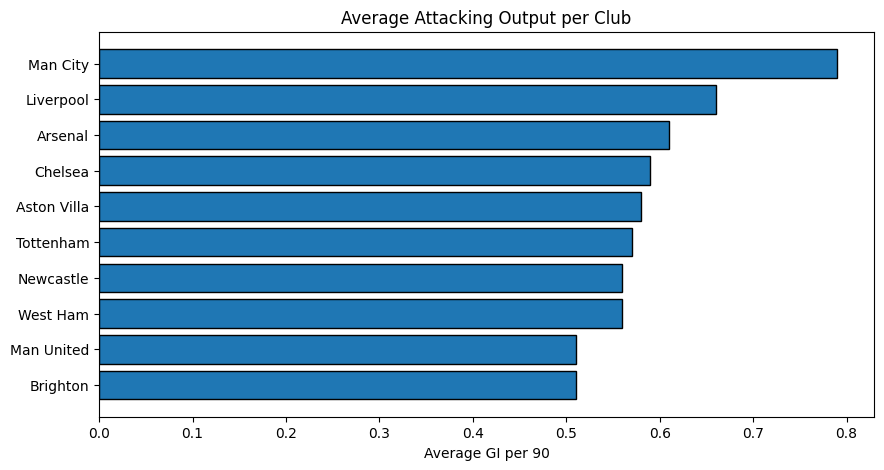

In [6]:
club_avg = df.groupby("club")["GI_per_90"].mean().sort_values().round(2)
#club_avg.head()

plt.figure(figsize=(10,5))
plt.barh(club_avg.index, club_avg.values, edgecolor="black")

plt.xlabel("Average GI per 90")
plt.title("Average Attacking Output per Club")
plt.show()

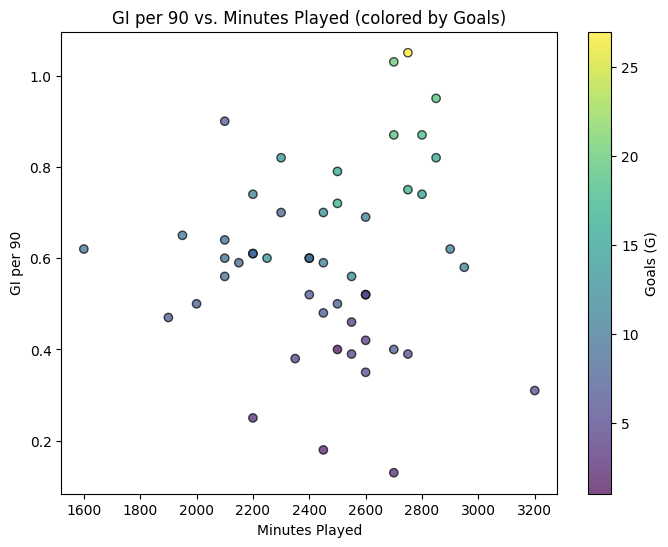

In [7]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(
    df["mins"],
    df["GI_per_90"],
    c=df["G"],
    cmap="viridis",
    alpha=0.7,
    edgecolor="black"
)

plt.colorbar(scatter, label="Goals (G)")

plt.xlabel("Minutes Played")
plt.ylabel("GI per 90")
plt.title("GI per 90 vs. Minutes Played (colored by Goals)")

plt.show()

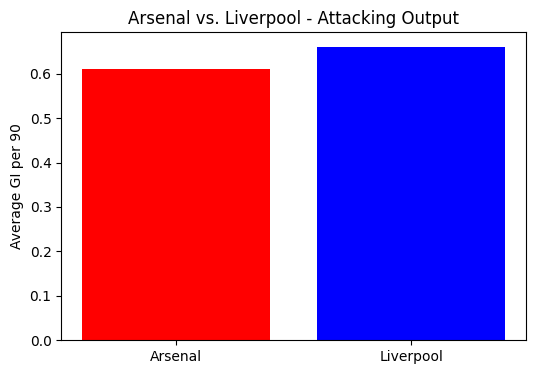

In [8]:
clubs = ["Arsenal", "Liverpool"]
subset = df[df["club"].isin(clubs)]

club_avg = subset.groupby("club")["GI_per_90"].mean().round(2)

plt.figure(figsize=(6,4))
plt.bar(club_avg.index, club_avg.values, color=["red", "blue"])

plt.ylabel("Average GI per 90")
plt.title("Arsenal vs. Liverpool - Attacking Output")

plt.show()

<Figure size 1200x600 with 0 Axes>

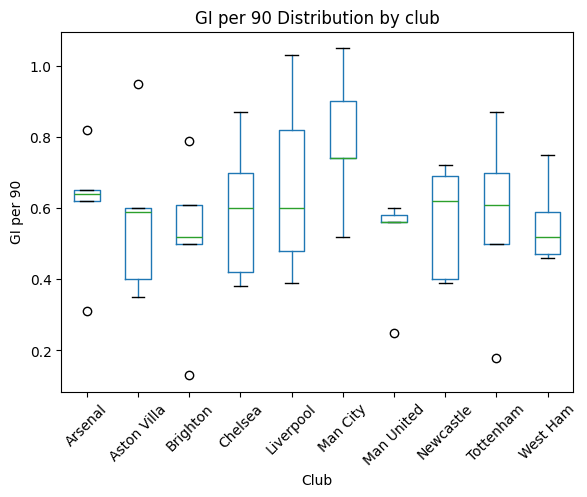

In [9]:
plt.figure(figsize=(12,6))

df.boxplot(column="GI_per_90", by="club", grid=False, rot=45)

plt.title("GI per 90 Distribution by club")
plt.suptitle("")
plt.xlabel("Club")
plt.ylabel("GI per 90")

plt.show()

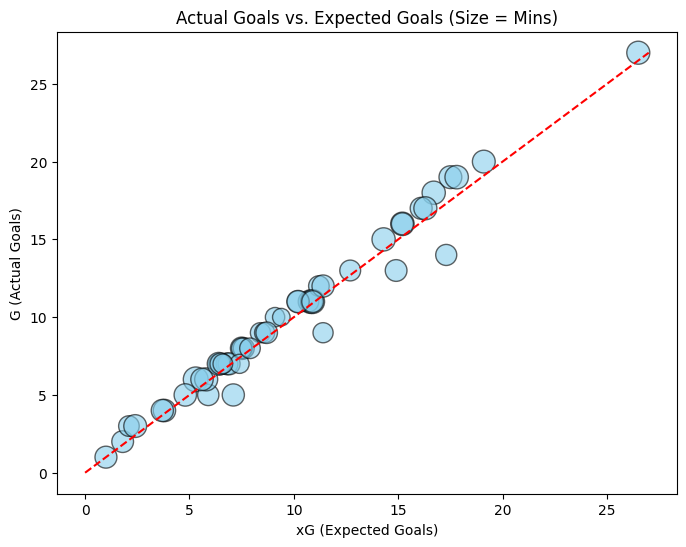

In [10]:
plt.figure(figsize=(8,6))

plt.scatter(
  df["xG"],
  df["G"],
  s=df["mins"] / 10,
  color="skyblue",
  edgecolor="black",
  alpha=0.6)



plt.xlabel("xG (Expected Goals)")
plt.ylabel("G (Actual Goals)")
plt.title("Actual Goals vs. Expected Goals (Size = Mins)")

max_val = max(df["xG"].max(), df["G"].max())
plt.plot([0, max_val], [0, max_val], color="red", linestyle="--")


plt.show()

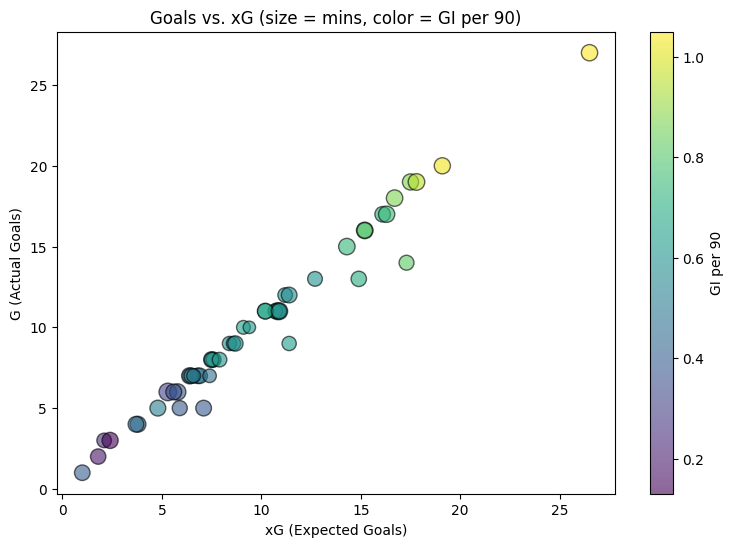

In [11]:
plt.figure(figsize=(9,6))

scatter = plt.scatter(
    df["xG"],
    df["G"],
    s=df["mins"]/20,
    c=df["GI_per_90"],
    cmap='viridis',
    alpha=0.6,
    edgecolor="black"
)

plt.colorbar(scatter, label="GI per 90"),

plt.xlabel("xG (Expected Goals)")
plt.ylabel("G (Actual Goals)")
plt.title("Goals vs. xG (size = mins, color = GI per 90)")

plt.show()

In [21]:
df["xGI"] = df["xG"] + df["xA"]
df.columns

Index(['name', 'club', 'position', 'mins', 'G', 'A', 'xG', 'xA', 'GI',
       'GI_per_90', 'xGI'],
      dtype='object')

In [26]:
import matplotlib.cm as cm

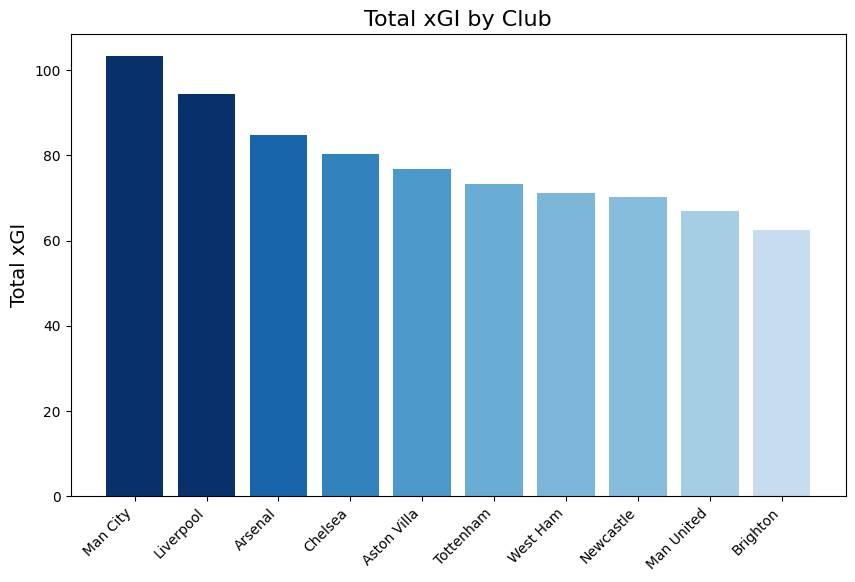

In [37]:
club_xgi = df.groupby("club")["xGI"].sum().sort_values(
    ascending=False
)

norm = (club_xgi - club_xgi.min()+10) / (club_xgi.max() - club_xgi.min())
colors = cm.Blues(norm)

plt.figure(figsize=(10,6))
plt.bar(
    club_xgi.index,
    club_xgi.values,
    color=colors
)

plt.title("Total xGI by Club", fontsize=16)
plt.ylabel("Total xGI", fontsize=14)
plt.xticks(rotation=45,ha="right")




plt.show()



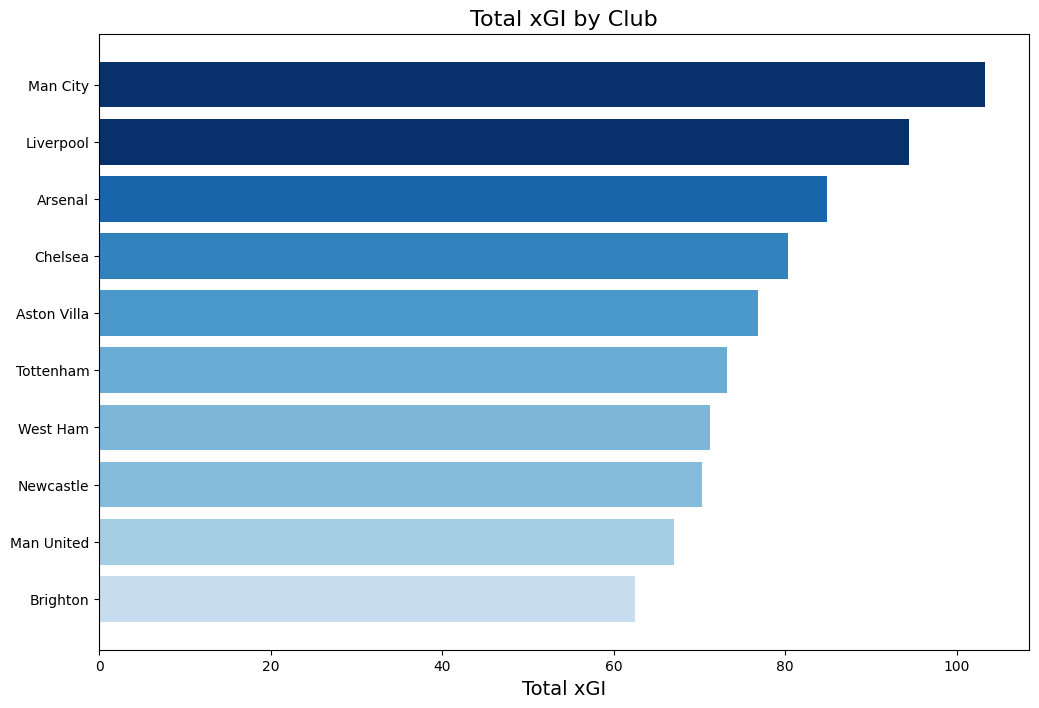

In [44]:
plt.figure(figsize=(12,8))

plt.barh(
    club_xgi.index,
    club_xgi.values,
    color=colors
)

plt.title("Total xGI by Club", fontsize=16)
plt.xlabel("Total xGI", fontsize=14)
# plt.yticks(rotation=45,ha="right")

plt.gca().invert_yaxis()

plt.show()

<Figure size 1200x800 with 0 Axes>

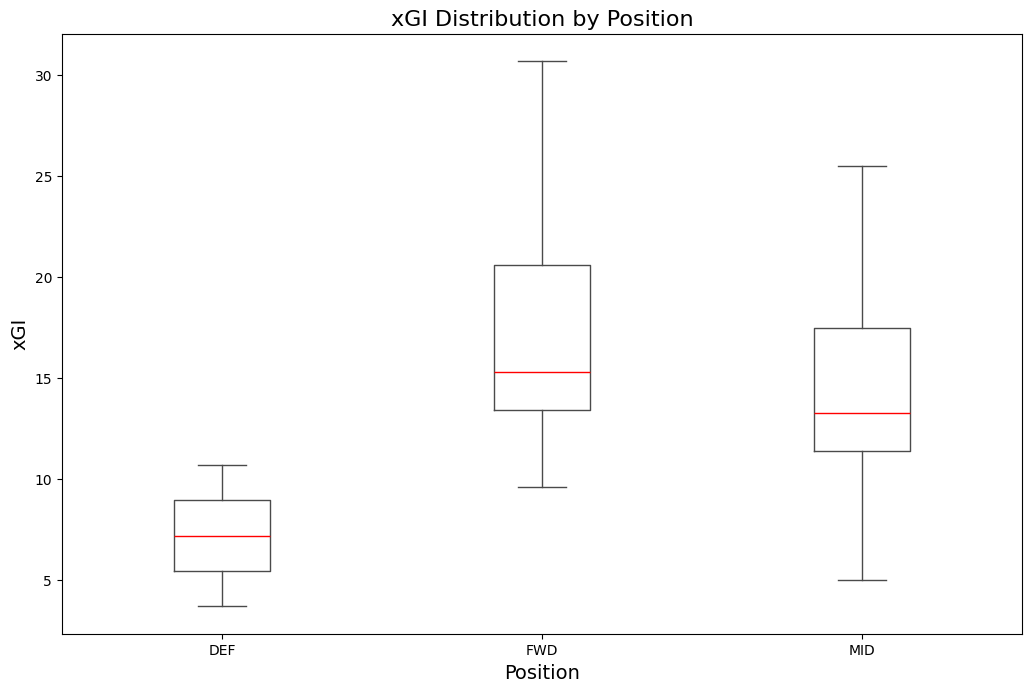

In [52]:
plt.figure(figsize=(12,8))

df.boxplot(
    column="xGI",
    by="position",
    grid=False,
    figsize=(12,8),
    color=dict(boxes="#4a4a4a", whiskers="#4a4a4a", medians="red", caps="#4a4a4a")
)

plt.title("xGI Distribution by Position", fontsize=16),
plt.suptitle("")
plt.xlabel("Position", fontsize=14)
plt.ylabel("xGI", fontsize=14)

plt.show()

/tmp/ipython-input-2798971559.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


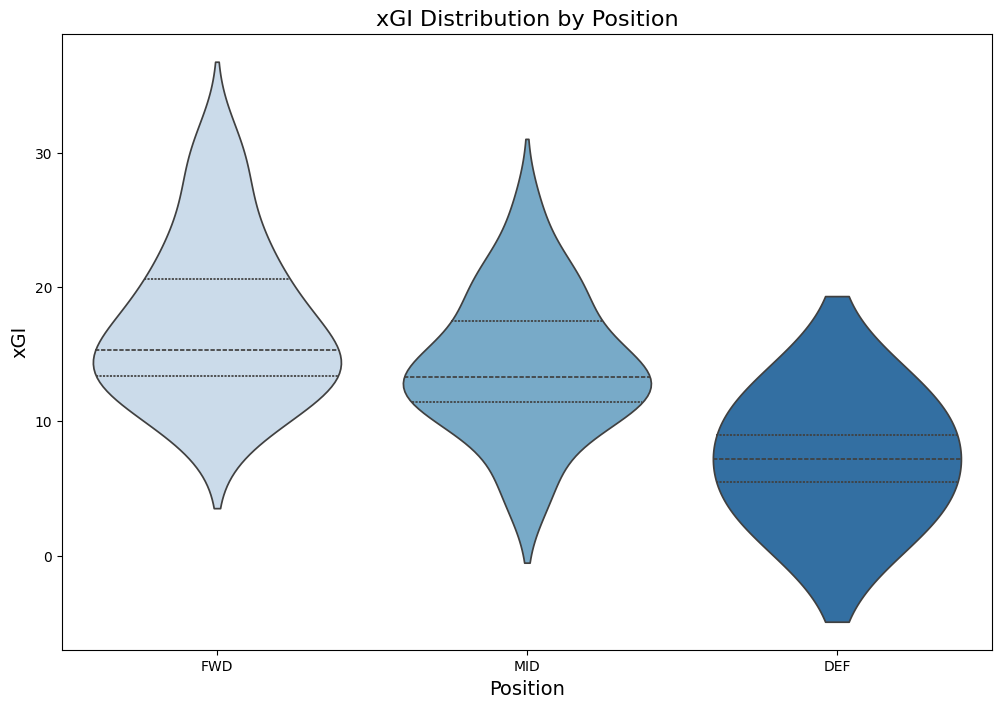

In [54]:
import seaborn as sns

plt.figure(figsize=(12,8))

sns.violinplot(
    data=df,
    x="position",
    y="xGI",
    inner="quartile",
    palette="Blues"
)

plt.title("xGI Distribution by Position", fontsize=16)
plt.xlabel("Position", fontsize=14)
plt.ylabel("xGI", fontsize=14)

plt.show()


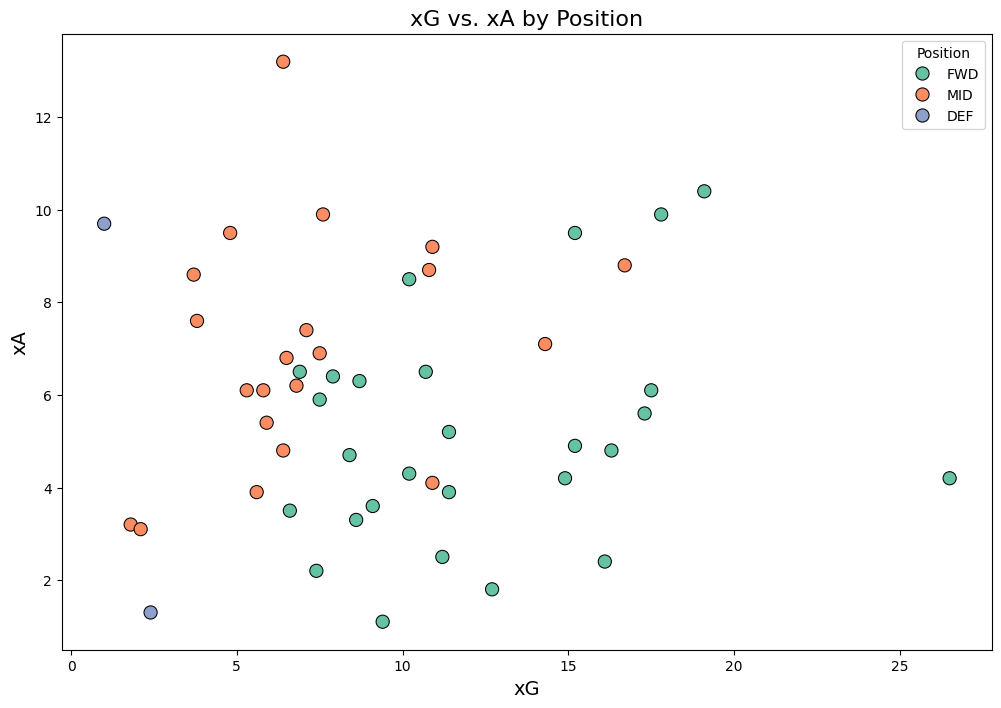

In [58]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    data=df,
    x="xG",
    y="xA",
    hue="position",
    palette="Set2",
    s=90,
    edgecolor="black"
)

plt.title("xG vs. xA by Position", fontsize=16)
plt.xlabel("xG", fontsize=14)
plt.ylabel("xA", fontsize=14)

plt.legend(title="Position")
plt.show()


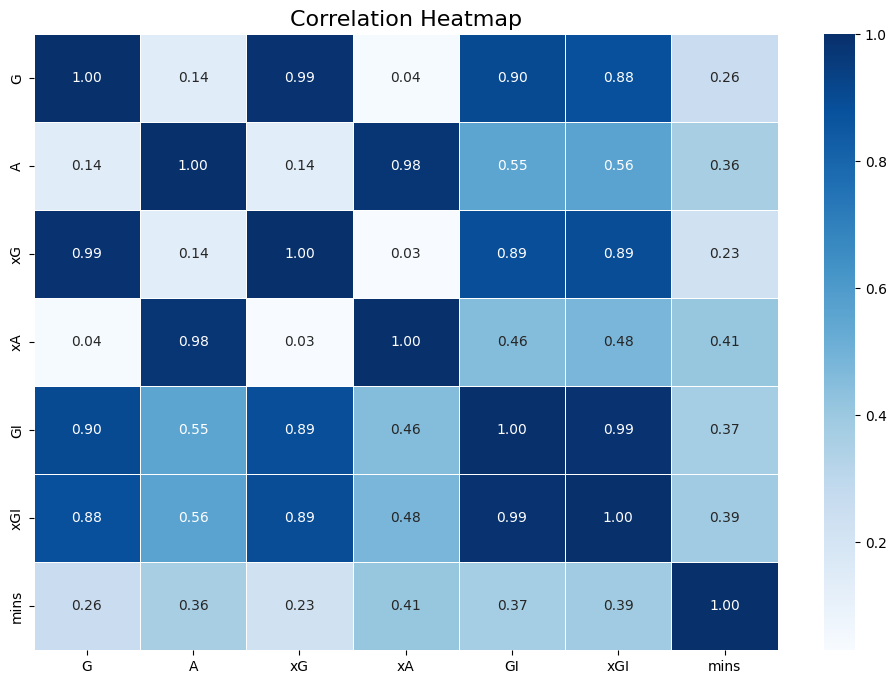

In [62]:
plt.figure(figsize=(12,8))

corr = df[["G", "A", "xG", "xA", "GI", "xGI", "mins"]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="Blues",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

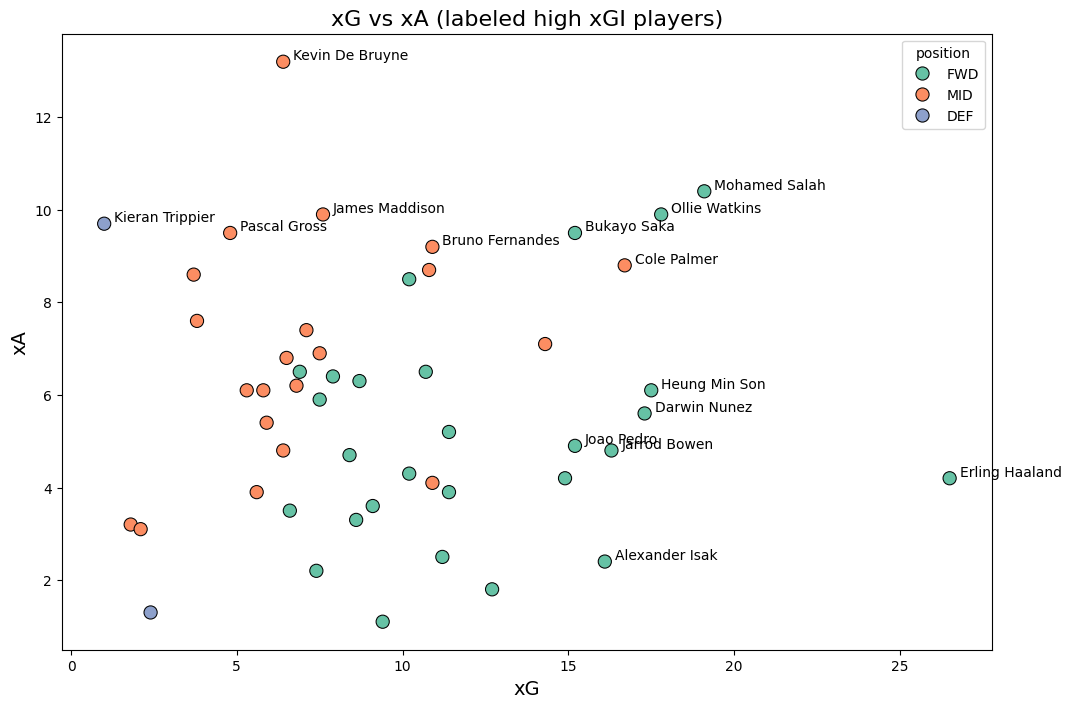

In [74]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    data=df,
    x="xG",
    y="xA",
    hue="position",
    palette="Set2",
    s=90,
    edgecolor="black"
)

for _, row in df[(df["xG"] > 15) | (df["xA"] > 9) ].iterrows():
  plt.text(
      row["xG"] + 0.3,
      row["xA"] + 0.05,
      row["name"],
      fontsize=10
  )

plt.title("xG vs xA (labeled high xGI players)", fontsize=16)
plt.xlabel("xG", fontsize=14)
plt.ylabel("xA", fontsize=14)

plt.show()

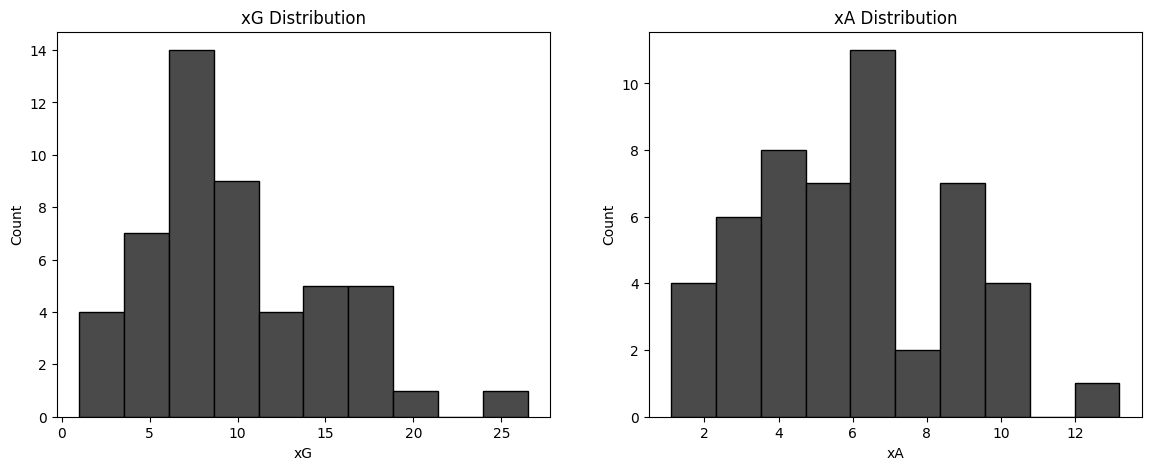

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left
axes[0].hist(df["xG"], bins=10, color="#4a4a4a", edgecolor="black")
axes[0].set_title("xG Distribution")
axes[0].set_xlabel("xG")
axes[0].set_ylabel("Count")

# Right
axes[1].hist(df["xA"], bins=10, color="#4a4a4a", edgecolor="black")
axes[1].set_title("xA Distribution")
axes[1].set_xlabel("xA")
axes[1].set_ylabel("Count")

plt.tight_layout
plt.savefig("xg_xa_hist.png", dpi=300, bbox_inches="tight")
plt.show()

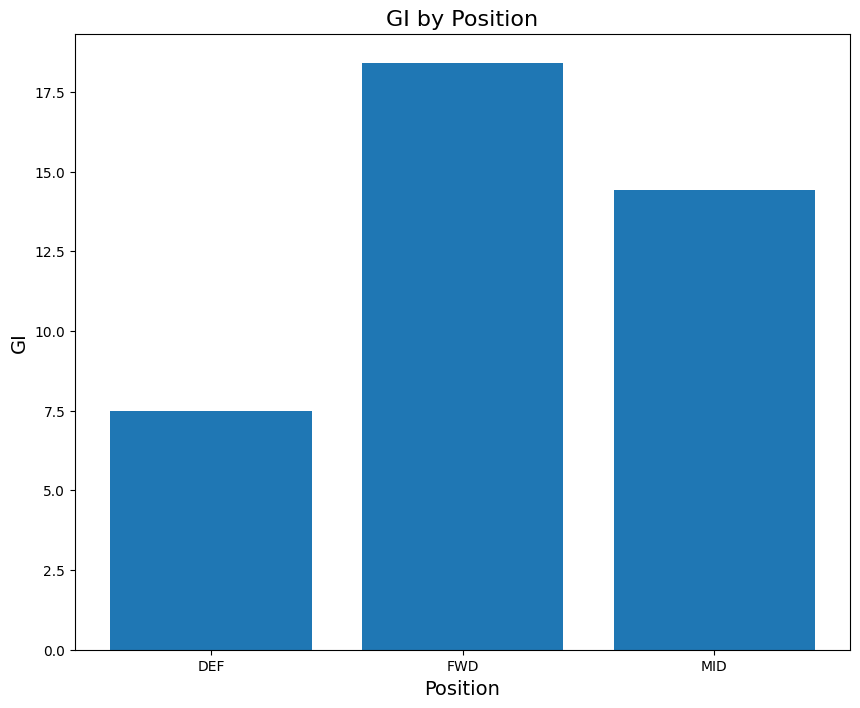

In [99]:
# Avg. GI per position

pos_gi = df.groupby("position")["GI"].mean()
plt.figure(figsize=(10,8))
plt.bar(
    pos_gi.index,
    pos_gi.values,
)

plt.title("GI by Position", fontsize=16)
plt.xlabel("Position", fontsize=14)
plt.ylabel("GI", fontsize=14)
plt.show()

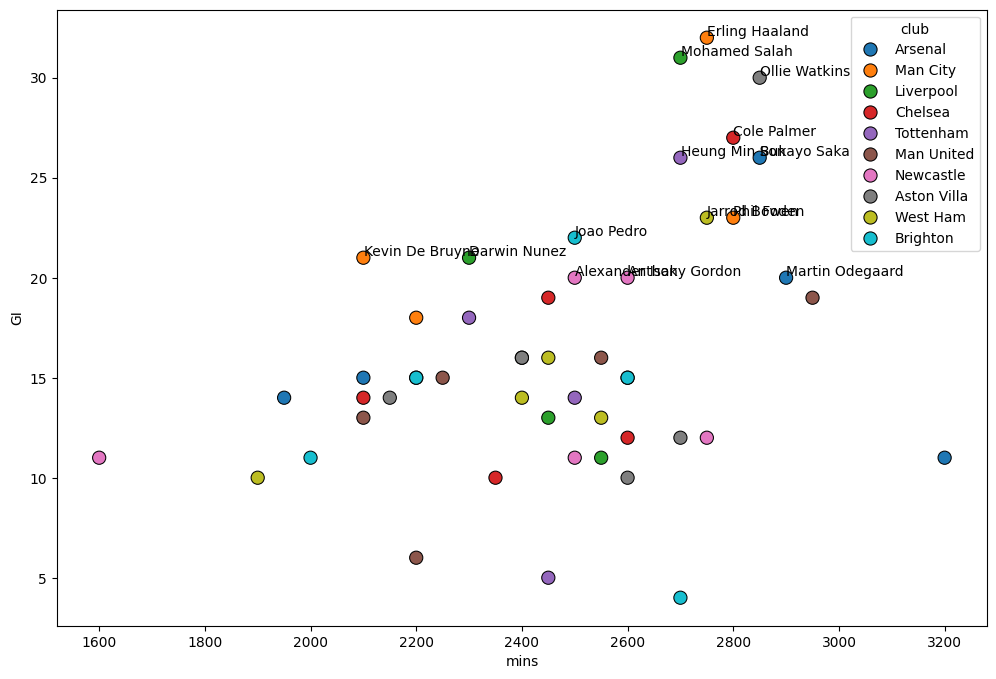

In [107]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    data=df,
    x="mins",
    y="GI",
    hue="club",
    s=90,
    edgecolor="black"
)

for _, row in df[df["GI"] >= 20].iterrows():
  plt.text(
      row["mins"]+0.3,
      row["GI"]+0.1,
      row["name"]
  )


plt.show()

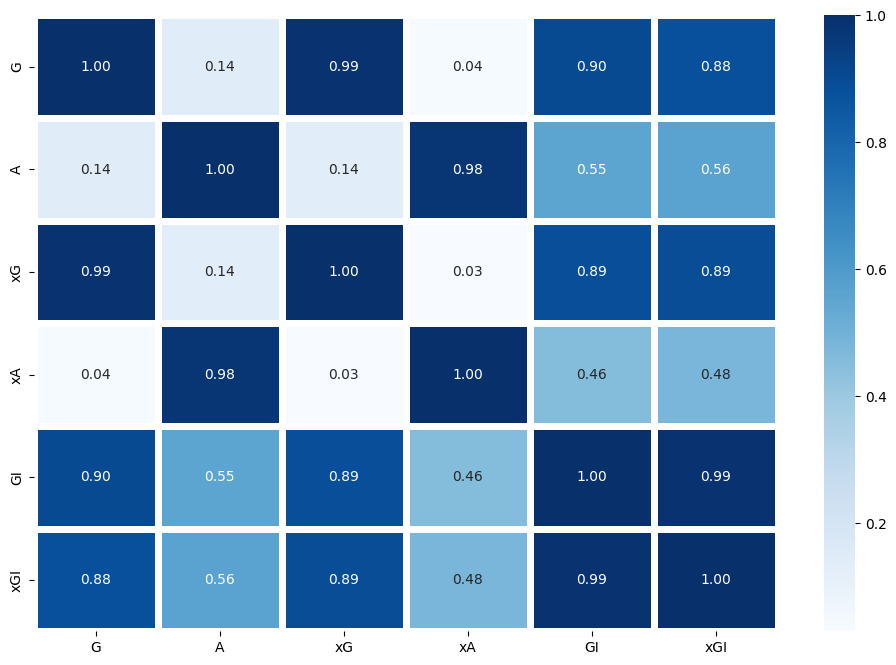

In [110]:
plt.figure(figsize=(12,8))

corr2 = df[["G", "A", "xG", "xA", "GI", "xGI"]].corr()

sns.heatmap(
    data=corr2,
    annot=True,
    cmap="Blues",
    fmt=".2f",
    linewidth=0.5

)

plt.show()